# Project: Wrangling and Analyze Data

This is a project that involves data wrangling of the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The data wrangling process involves three key steps, i.e.
1. Gathering data
2. Assessing data and,
3. Cleaning data


In [1]:
#Importing libraries to be used in this project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import IPython.display as Disp

## Data Gathering
In the cell belows, I gather **all** three pieces of data for this project and load them in the notebook. **Note:** The methods required to gather each data are different.
1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv). This data was provided by Udacity.

In [2]:
#Loading the dataset and reading it into a pandas dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction file (image_predictions.tsv), also provided by Udacity, where:
    - p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
    - p1_conf is how confident the algorithm is in its #1 prediction → 95%
    - p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
    - p2 is the algorithm's second most likely prediction → Labrador retriever
    - p2_conf is how confident the algorithm is in its #2 prediction → 1%
    - p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
        etc.

In [3]:
#Downloading the file programmatically using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
#Reading the file into a pandas dataframe
df2 = pd.read_csv('image-predictions.tsv', sep = '\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt).

In [5]:
consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [6]:
#Storing the tweet ids from the first dataset into a list format
twt_id = df1.tweet_id.to_list()
twt_id

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [7]:
#Doing a for loop on the tweet ids
for tweet_id in twt_id:
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    print(tweet)

Status(_api=<tweepy.api.API object at 0x000000A482CE4430>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

NotFound: 404 Not Found
144 - No status found with that ID.

In [8]:
#Getting the attributes of the python object
for tweet_id in twt_id:
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    print(f'{dir(tweet)}')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__

NotFound: 404 Not Found
144 - No status found with that ID.

In [9]:
print(type(tweet._json))
print(tweet._json)
with open('sample.txt','w') as outfile:
    json.dump(tweet._json, outfile)

<class 'dict'>
{'created_at': 'Sat Jul 22 00:23:06 +0000 2017', 'id': 888554962724278272, 'id_str': '888554962724278272', 'full_text': "This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK", 'truncated': False, 'display_text_range': [0, 87], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 888554915546542081, 'id_str': '888554915546542081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg', 'url': 'https://t.co/YnYAFCTTiK', 'display_url': 'pic.twitter.com/YnYAFCTTiK', 'expanded_url': 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1600, 'h': 1016, 'resize': 'fit'}, 'small': {'w': 680, 'h': 432, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 762, 'resize': 'fit'}}}]}, 'extende

In [10]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:    
    for tweet_id in twt_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [11]:
#Reading the file into a pandas dataframe
df3 = pd.read_json('tweet_json.txt', lines = True)
df3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## Assessing Data
In this section, I detect and document at least **eight (8) quality issues and two (2) tidiness issues** using both visual and programmatic assessements, to assess the data.

A few key points given by Udacity:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Dataset 1

In [12]:
#Assessing dataset 1 visually
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
df1.shape

(2356, 17)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
df1.duplicated().sum()

0

In [18]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
533,807621403335917568,NaN,NaN,2016-12-10 16:22:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,None,None,pupper,None
1908,674436901579923456,NaN,NaN,2015-12-09 03:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bailey. She plays with her food. Very chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None
585,800018252395122689,NaN,NaN,2016-11-19 16:49:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo doin a struggle. 11/10 much det...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800018252...,11,10,None,doggo,None,None,None
1811,676819651066732545,NaN,NaN,2015-12-15 17:42:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Watch out Airbud. This pupper is also good at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676819651...,12,10,None,None,None,pupper,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
1443,696744641916489729,NaN,NaN,2016-02-08 17:17:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Klevin. He doesn't want his family bra...,NaN,NaN,NaN,https://vine.co/v/i1wrljBUjAu,10,10,Klevin,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,None,None,None,None
1857,675517828909424640,NaN,NaN,2015-12-12 03:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 stay woke https://t.co/XDiQw4Akiw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675517828...,12,10,None,None,None,None,None
929,754482103782404096,NaN,NaN,2016-07-17 01:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,None,None,None,None
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None


In [19]:
#Assessing the names column as I noted some were listed as 'None'
df1['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
df1[df1['name'] == 'None'].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1317,706593038911545345,NaN,NaN,2016-03-06 21:31:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sneak peek of me on spring break. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706593038...,10,10,None,None,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
1473,693647888581312512,NaN,NaN,2016-01-31 04:11:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
1405,699323444782047232,NaN,NaN,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699323444...,10,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [21]:
df1['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [22]:
df1[df1['name'] == 'unacceptable']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,None,None,None,None


In [23]:
df1[df1['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [24]:
#Assessing tweets that may not be of dogs
df1[df1['text'].str.contains('We only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None


In [25]:
#Assessing the rating numerators
df1['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [27]:
df1[df1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\barasa\AppData\Local\Temp/ipykernel_8720/429086183.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df1[df1.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [29]:
df1.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [31]:
df1.text[1712]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

### Assessing Dataset 2

In [33]:
#Assessing dataset 2 visually
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [34]:
df2.shape

(2075, 12)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
df2.duplicated().sum()

0

In [39]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
1659,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True
240,670442337873600512,https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg,1,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True


In [40]:
df2['p1'].sort_values().unique()

array(['Afghan_hound', 'African_crocodile', 'African_grey',
       'African_hunting_dog', 'Airedale',
       'American_Staffordshire_terrier', 'American_black_bear', 'Angora',
       'Appenzeller', 'Arabian_camel', 'Arctic_fox', 'Australian_terrier',
       'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel',
       'Border_collie', 'Border_terrier', 'Boston_bull',
       'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'Christmas_stocking',
       'Dandie_Dinmont', 'Doberman', 'Egyptian_cat', 'English_setter',
       'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog',
       'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter',
       'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog',
       'Ibizan_hound', 'Irish_setter', 'Irish_terrier',
       'Irish_water_spaniel', 'Italian_greyhound', 'Japanese_spaniel',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
    

In [41]:
#Assessing which #1 predictions are breeds of dogs
df2[df2['p1_dog'] == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [42]:
#Assessing which #1 predictions are not breeds of dogs
df2[df2['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


### Assessing Dataset 3

In [43]:
#Assessing dataset 3 visually
df3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,2015-11-19 03:10:02+00:00,667177989038297088,667177989038297088,This is a Dasani Kingfisher from Maine. His na...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667177985389236225, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2074,2015-11-19 03:02:47+00:00,667176164155375616,667176164155375616,These are strange dogs. All have toupees. Long...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667176160305000449, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2075,2015-11-19 02:58:01+00:00,667174963120574464,667174963120574464,This is Clarence. His face says he doesn't wan...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667174956317454336, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2076,2015-11-19 02:43:18+00:00,667171260800061440,667171260800061440,Say hello to Kenneth. He likes Reese's Puffs. ...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667171256467398656, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [44]:
df3.shape

(2078, 32)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2078 non-null   datetime64[ns, UTC]
 1   id                             2078 non-null   int64              
 2   id_str                         2078 non-null   int64              
 3   full_text                      2078 non-null   object             
 4   truncated                      2078 non-null   bool               
 5   display_text_range             2078 non-null   object             
 6   entities                       2078 non-null   object             
 7   extended_entities              1836 non-null   object             
 8   source                         2078 non-null   object             
 9   in_reply_to_status_id          72 non-null     float64            
 10  in_reply_to_status_id_st

In [46]:
df3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.078000e+03,2.078000e+03,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,0.0,0.0,0.0,2078.000000,2078.000000,1953.0,1953.0,2.400000e+01,2.400000e+01
mean,7.432127e+17,7.432127e+17,7.456963e+17,7.456963e+17,2.182018e+16,2.182018e+16,NaN,NaN,NaN,2491.472570,7250.311838,0.0,0.0,8.193771e+17,8.193771e+17
std,7.086329e+16,7.086329e+16,7.703333e+16,7.703333e+16,1.303234e+17,1.303234e+17,NaN,NaN,NaN,4007.799477,10935.330516,0.0,0.0,5.726995e+16,5.726995e+16
min,6.671656e+17,6.671656e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,7.061659e+17,7.061659e+17
25%,6.782926e+17,6.782926e+17,6.756548e+17,6.756548e+17,2.674822e+08,2.674822e+08,NaN,NaN,NaN,498.500000,1256.250000,0.0,0.0,7.942973e+17,7.942973e+17
50%,7.109208e+17,7.109208e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1147.500000,2964.000000,0.0,0.0,8.356085e+17,8.356085e+17
75%,8.066097e+17,8.066097e+17,8.279245e+17,8.279245e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2921.250000,9344.750000,0.0,0.0,8.676130e+17,8.676130e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,52724.000000,123717.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [47]:
df3.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 242
source                              0
in_reply_to_status_id            2006
in_reply_to_status_id_str        2006
in_reply_to_user_id              2006
in_reply_to_user_id_str          2006
in_reply_to_screen_name          2006
user                                0
geo                              2078
coordinates                      2078
place                            2077
contributors                     2078
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                125
possibly_sensitive_appealable     125
lang        

In [49]:
df3.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1515,2015-12-24 03:12:15+00:00,679862121895714818,679862121895714816,"""Dammit hooman I'm jus trynna lik the fler"" 11...",False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679862116216651776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
44,2017-07-08 00:28:19+00:00,883482846933004288,883482846933004288,This is Bella. She hopes her smile made you sm...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 883482838036860928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1680,2015-12-10 00:10:43+00:00,674743008475090944,674743008475090944,This is Sophie. She just saw a spider. 10/10 d...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674743003064438784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1582,2015-12-17 01:35:24+00:00,677301033169788928,677301033169788928,This is Juckson. He's totally on his way to a ...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677301027595530240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1096,2016-03-08 04:25:07+00:00,707059547140169728,707059547140169728,Say hello to Cupcake. She's an Icelandic Dippe...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 707059520279810048, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1005,2016-03-29 23:29:14+00:00,714957620017307648,714957620017307648,This is Curtis. He's an Albino Haberdasher. Te...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 714957616947052546, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
268,2017-03-07 22:22:32+00:00,839239871831150596,839239871831150592,This is Odie. He's big. 13/10 would attempt to...,False,"[0, 51]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 839239862192648194, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
405,2017-01-18 17:07:18+00:00,821765923262631936,821765923262631936,This is Duchess. She uses dark doggo forces to...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821765912948772865, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
83,2017-06-18 16:57:37+00:00,876484053909872640,876484053909872640,This is Benedict. He wants to thank you for th...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876484043352588288, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1367,2016-01-13 04:23:58+00:00,687127927494963200,687127927494963200,Meet Gordon. He's an asshole. 9/10 would still...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687127922726039555, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### Quality issues
1. Dataset 1:

- Incorrect data type for column 'timestamp' - should be datetime
- Incorrect data type for column 'tweet ids' - should be string as this is an identifier
- Remove rows that have retweet status ID as these are not original ratings
- Irrelevant columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
- Rows with text that contains "We only rate dogs" in the 'text' column are not dogs.
- Values with 'None' instead of 'NaN' in the columns: 'doggo', 'fluffer', 'pupper' and 'puppo'
- Incorrect extraction of some rating_numerator values
- Incorrect data type for column 'rating_numerator' - should be float

2. Dataset 2:
- Incorrect data type for column 'tweet ids'- should be string as this is an identifier.
- Rows where the number one predictions(i.e. column 'p1_dog' is false) are not dogs

3. Dataset 3:
- Incorrect data type for column 'tweet ids'- should be string as this is an identifier
- Inconsistency in column name to identify tweet ids. Change 'id' to tweet_id'
- Irrelevant columns not needed in my analysis

### Tidiness issues
1. 1 variable (dog stage) in 4 columns i.e. doggo, fluffer, pupper, puppo
2. Combine all three datasets

## Cleaning Data
In this section, I clean all issues documented while assessing. I used the define, code and test process to clean my data.

In [50]:
# Making copies of the original datasets
df1_new = df1.copy()
df2_new = df2.copy()
df3_new = df3.copy()

### Issue #1:

#### Define: Changing the datatype for the column 'timestamp' from object to datetime

#### Code

In [51]:
df1_new['timestamp'] = pd.to_datetime(df1_new['timestamp'])

#### Test

In [52]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

#### Define: Changing the data type for the column 'tweet_id' to string as this is an identifier

#### Code

In [53]:
df1_new['tweet_id'] = df1_new['tweet_id'].astype(str)

#### Test

In [54]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: 

#### Define: Deleting rows that have retweet status ID as these are not original ratings and should not be included in the analysis

#### Code

In [55]:
#Tweets that are retweets and not original tweets
df1_new[df1_new['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [56]:
#Getting the index of the retweets
rt = df1_new[df1_new['retweeted_status_id'].isnull() == False].index
rt

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [57]:
#Dropping the rows
df1_new.drop(rt, inplace = True)

#### Test

In [58]:
df1_new[df1_new['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define: Dropping columns irrelevant to my analysis ie 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'

#### Code

In [59]:
#Dropping irrelevant columns
df1_new = df1_new.drop(columns=['timestamp','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                                'retweeted_status_timestamp', 'expanded_urls']).reset_index(drop=True)

#### Test

In [60]:
df1_new

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2171,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2172,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2173,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [61]:
df1_new.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #5:

#### Define: Deleting rows with text that contains "We only rate dogs" in the 'text' column, as these are not dogs

#### Code

In [62]:
#Extracting rows with text that contains 'We only rate dogs'
df1_new[df1_new['text'].str.contains('We only rate dogs')]

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
24,887101392804085760,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,12,10,None,None,None,None,None
56,880872448815771648,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,12,10,None,None,None,None,None
85,874057562936811520,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",12,10,None,None,None,None,None
113,867900495410671616,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,12,10,None,None,None,None,None
116,867051520902168576,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",13,10,None,None,None,None,None
124,864873206498414592,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,14,10,None,None,None,None,None
136,862096992088072192,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,13,10,None,None,None,None,None
147,859196978902773760,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12,10,quite,None,None,None,None
190,849776966551130114,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,12,10,None,None,None,None,None
194,848690551926992896,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,12,10,None,None,None,None,None


In [63]:
#Getting the index of these tweets
not_dogs = df1_new[df1_new['text'].str.contains('We only rate dogs')].index
not_dogs

Int64Index([  24,   56,   85,  113,  116,  124,  136,  147,  190,  194,  212,
             264,  329,  350,  353,  408,  434,  450,  592,  602,  647,  662,
             720,  841,  854,  893,  899,  912,  919,  924,  943,  972, 1015,
            1029, 1056, 1111, 1183, 1206, 1256, 1348, 1385, 1431, 1514, 1520,
            1558, 1566, 1698, 1759],
           dtype='int64')

In [64]:
#Dropping the tweets
df1_new.drop(not_dogs, inplace = True)

#### Test

In [65]:
df1_new[df1_new['text'].str.contains('We only rate dogs')]

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:

#### Define: Converting the values with 'None' to 'NaN' in the columns 'doggo', 'fluffer', 'pupper' and 'puppo'

#### Code

In [66]:
#Replacing the 'None' values with 'NaN'
df1_new.doggo.replace('None', np.nan, inplace=True)
df1_new.floofer.replace('None', np.nan, inplace=True)
df1_new.pupper.replace('None', np.nan, inplace=True)
df1_new.puppo.replace('None', np.nan, inplace=True)

#### Test

In [67]:
df1_new

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,NaN,NaN,NaN
2171,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,NaN,NaN,NaN
2172,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,NaN,NaN,NaN
2173,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,NaN,NaN,NaN


### Issue #7: 

#### Define: Extracting the correct values for the rating numerator

#### Code:

In [68]:
df1_new[df1_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\barasa\AppData\Local\Temp/ipykernel_8720/260410116.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df1_new[df1_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
42,This is Bella. She hopes her smile made you sm...,5
558,"This is Logan, the Chow who lived. He solemnly...",75
617,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1510,I've been told there's a slight possibility he...,5
1533,Here we have uncovered an entire battalion of ...,26


In [69]:
#Extracting the correct rating numerator for all tweets
df1_new['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

0       13
1       13
2       12
3       13
4       12
        ..
2170     5
2171     6
2172     9
2173     7
2174     8
Name: text, Length: 2127, dtype: object

In [70]:
df1_new['rating_numerator'] = df1_new['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### Test:

In [71]:
df1_new[df1_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\barasa\AppData\Local\Temp/ipykernel_8720/260410116.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df1_new[df1_new.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
42,This is Bella. She hopes her smile made you sm...,13.5
558,"This is Logan, the Chow who lived. He solemnly...",9.75
617,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1510,I've been told there's a slight possibility he...,9.5
1533,Here we have uncovered an entire battalion of ...,11.26


### Issue #8:

#### Define: Converting the datatype of the rating numerator from string to float

#### Code:

In [72]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2127 non-null   object
 1   source              2127 non-null   object
 2   text                2127 non-null   object
 3   rating_numerator    2127 non-null   object
 4   rating_denominator  2127 non-null   int64 
 5   name                2127 non-null   object
 6   doggo               87 non-null     object
 7   floofer             10 non-null     object
 8   pupper              234 non-null    object
 9   puppo               25 non-null     object
dtypes: int64(1), object(9)
memory usage: 182.8+ KB


In [73]:
df1_new['rating_numerator'] = df1_new['rating_numerator'].astype(float)

#### Test

In [74]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2127 non-null   object 
 1   source              2127 non-null   object 
 2   text                2127 non-null   object 
 3   rating_numerator    2127 non-null   float64
 4   rating_denominator  2127 non-null   int64  
 5   name                2127 non-null   object 
 6   doggo               87 non-null     object 
 7   floofer             10 non-null     object 
 8   pupper              234 non-null    object 
 9   puppo               25 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 182.8+ KB


### Issue #9:

#### Define: Changing the data type for tweet ids to string as this is an identifier (Dataset 2)

#### Code

In [75]:
df2_new['tweet_id'] = df2_new['tweet_id'].astype(str)

#### Test

In [76]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #10:

#### Define: Deleting rows where the number 1 predictions are not dogs (Dataset 2)

#### Code

In [77]:
#Extracting rows where the predictions are not dogs
df2_new[df2_new['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [78]:
x = df2_new[df2_new['p1_dog'] == False].index
x

Int64Index([   6,    8,   17,   18,   21,   22,   25,   29,   33,   43,
            ...
            1992, 2012, 2013, 2021, 2022, 2026, 2046, 2052, 2071, 2074],
           dtype='int64', length=543)

In [79]:
df2_new.drop(x, inplace = True)

#### Test

In [80]:
df2_new[df2_new['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #11:

#### Define: Changing the data type for tweet ids to string as this is an identifier(Dataset 3)

#### Code

In [81]:
df3_new['id'] = df3_new['id'].astype(str)

#### Test

In [82]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2078 non-null   datetime64[ns, UTC]
 1   id                             2078 non-null   object             
 2   id_str                         2078 non-null   int64              
 3   full_text                      2078 non-null   object             
 4   truncated                      2078 non-null   bool               
 5   display_text_range             2078 non-null   object             
 6   entities                       2078 non-null   object             
 7   extended_entities              1836 non-null   object             
 8   source                         2078 non-null   object             
 9   in_reply_to_status_id          72 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #12: 

#### Define: Changing the column name 'id' to 'tweet_id' 

#### Code

In [83]:
df3_new.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [84]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2078 non-null   datetime64[ns, UTC]
 1   tweet_id                       2078 non-null   object             
 2   id_str                         2078 non-null   int64              
 3   full_text                      2078 non-null   object             
 4   truncated                      2078 non-null   bool               
 5   display_text_range             2078 non-null   object             
 6   entities                       2078 non-null   object             
 7   extended_entities              1836 non-null   object             
 8   source                         2078 non-null   object             
 9   in_reply_to_status_id          72 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #13:

#### Define: Extracting columns relevant to my analysis i.e. 'tweet_id','retweet_count','favorite_count'

#### Code

In [85]:
df3_new.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [86]:
df3_new = df3_new[['tweet_id','retweet_count','favorite_count']]

#### Test

In [87]:
df3_new

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6981,33712
1,892177421306343426,5283,29247
2,891815181378084864,3468,21987
3,891689557279858688,7195,36799
4,891327558926688256,7725,35185
...,...,...,...
2073,667177989038297088,48,166
2074,667176164155375616,386,525
2075,667174963120574464,69,218
2076,667171260800061440,72,186


### Issue #14: Merging the columns 'doggo', 'floofer', 'pupper' and 'puppo' into one column

In [88]:
df1_new.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [89]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [90]:
df1_new[dog_stages] = df1_new[dog_stages]
def join_all(x):
    return ', '.join(x.dropna().astype(str))

In [91]:
df1_new['dog_stages'] = df1_new[dog_stages].apply(join_all, axis=1)

In [92]:
df1_new['dog_stages'] = df1_new['dog_stages'].replace('', np.nan)

In [93]:
#Dropping the columns: doggo, floofer, pupper, puppo
df1_new = df1_new.drop(columns=['doggo', 'floofer', 'pupper', 'puppo']).reset_index(drop=True)

#### Test

In [94]:
df1_new

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN
...,...,...,...,...,...,...,...
2122,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,NaN
2123,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,NaN
2124,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10,a,NaN
2125,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10,a,NaN


In [95]:
df1_new['dog_stages'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

### Issue #15:

#### Define: Combining all three datasets i.e, df1_new, df2_new and df3_new

#### Code

In [96]:
df4 = pd.merge(
    left = df1_new,
    right = df3_new,
    how = 'left',
    left_on = 'tweet_id',
    right_on = 'tweet_id',
    sort = False,
    suffixes = ('_x', '_y')
)

In [97]:
df5 = pd.merge(
    left = df4,
    right = df2_new,
    how = 'left',
    left_on = 'tweet_id',
    right_on = 'tweet_id',
    sort = False,
    suffixes = ('_x', '_y')
)

#### Test

In [98]:
df5

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,6981.0,33712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,5283.0,29247.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,3468.0,21987.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,7195.0,36799.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,7725.0,35185.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2123,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2124,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10,a,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2125,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10,a,NaN,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [99]:
df5.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stages', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
df5.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, I analyze and visualize my wrangled data. The data that was used in my analysis and visualisation is from the ‘twitter_archive_master.csv’.

In [101]:
#Loading the cleaned data into my notebook
cleaned_data = pd.read_csv('twitter_archive_master.csv')
cleaned_data.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,6981.0,33712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,5283.0,29247.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,3468.0,21987.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,7195.0,36799.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,7725.0,35185.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [102]:
cleaned_data.shape

(2127, 20)

In [103]:
#Checking for the most common dog stage
cleaned_data.dog_stages.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

<AxesSubplot:>

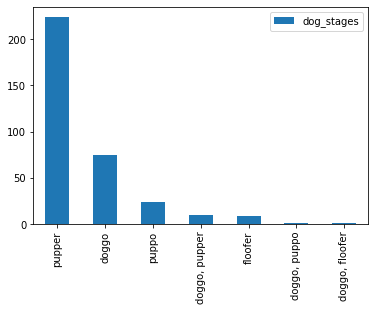

In [104]:
#Plotting a bar graph to show the distribution of the dog stages
cleaned_data['dog_stages'].value_counts().to_frame().plot(kind = "bar")

In [113]:
cleaned_data[cleaned_data['dog_stages'] == 'doggo, pupper']

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
367,817777686764523521,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13.0,10,Dido,"doggo, pupper",2517.0,10203.0,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1.0,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
425,808106460588765185,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12.0,10,None,"doggo, pupper",2062.0,8361.0,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
449,802265048156610565,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11.0,10,None,"doggo, pupper",1291.0,6605.0,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1.0,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
456,801115127852503040,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12.0,10,Bones,"doggo, pupper",1982.0,7664.0,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1.0,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
549,785639753186217984,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10.0,10,Pinot,"doggo, pupper",2100.0,7443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,781308096455073793,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0,10,None,"doggo, pupper",2377.0,6727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,759793422261743616,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10,Maggie,"doggo, pupper",NaN,NaN,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
758,751583847268179968,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5.0,10,None,"doggo, pupper",NaN,NaN,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
860,741067306818797568,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,12.0,10,just,"doggo, pupper",2807.0,8843.0,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
905,733109485275860992,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12.0,10,None,"doggo, pupper",15473.0,49255.0,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1.0,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False


In [114]:
cleaned_data[cleaned_data['dog_stages'] == 'doggo, puppo']

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
157,855851453814013952,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13.0,10,None,"doggo, puppo",16101.0,41855.0,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1.0,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True


In [116]:
cleaned_data.text[157]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [115]:
cleaned_data[cleaned_data['dog_stages'] == 'doggo, floofer']

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
164,854010172552949760,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11.0,10,None,"doggo, floofer",2787.0,14814.0,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1.0,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True


In [117]:
cleaned_data.text[164]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [105]:
#Analysing the pupper dog stage
pupper = cleaned_data[cleaned_data['dog_stages'] == 'pupper']
pupper

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,12.0,10,Roscoe,pupper,2617.0,18507.0,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1.0,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
45,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,12.0,10,Gus,pupper,4083.0,24717.0,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1.0,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
52,881536004380872706,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14.0,10,a,pupper,13362.0,43321.0,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1.0,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
73,876838120628539392,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,12.0,10,Ginger,pupper,2797.0,18176.0,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1.0,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True
82,874296783580663808,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,13.0,10,Jed,pupper,3473.0,22902.0,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1.0,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,672594978741354496,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,9.0,10,Scott,pupper,529.0,1178.0,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1.0,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
1775,672481316919734272,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,12.0,10,Jazz,pupper,110.0,639.0,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1.0,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
1782,672254177670729728,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,11.0,10,Rolf,pupper,648.0,1274.0,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1.0,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True
1788,672205392827572224,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,9.0,10,Opal,pupper,1006.0,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Checking the top 5 dog breeds in the pupper stage
pupper['p1'].value_counts().iloc[:5,]

golden_retriever      16
Pembroke              10
Labrador_retriever     8
pug                    8
Chihuahua              6
Name: p1, dtype: int64

In [107]:
#Checking for the most retweeted dog breed based on the image predictions
cleaned_data.groupby('p1').mean().sort_values(by='retweet_count', ascending=False)

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
p1,,,,,,,,,
standard_poodle,7.262901e+17,10.500000,10.0,8762.750000,21084.250000,1.000000,0.423407,0.204231,0.072459
black-and-tan_coonhound,7.602637e+17,10.500000,10.0,6584.000000,29155.000000,2.500000,0.692000,0.147506,0.097786
Saluki,8.315403e+17,12.500000,10.0,5220.333333,26667.333333,1.000000,0.523054,0.208351,0.118570
English_springer,7.204467e+17,11.111111,10.0,4850.666667,13410.444444,1.000000,0.546486,0.200781,0.080672
Afghan_hound,8.041621e+17,9.666667,10.0,4774.000000,14671.000000,1.000000,0.433959,0.099034,0.081650
...,...,...,...,...,...,...,...,...,...
Tibetan_terrier,6.973258e+17,9.250000,10.0,386.000000,1393.333333,1.000000,0.408551,0.144144,0.069139
Japanese_spaniel,6.773010e+17,5.000000,10.0,354.000000,1109.000000,1.000000,0.661178,0.150119,0.119720
groenendael,6.939424e+17,10.000000,10.0,328.000000,1621.000000,1.000000,0.550796,0.154770,0.080802


In [108]:
#Checking for the most liked dog breed based on the image predictions
cleaned_data.groupby('p1').mean().sort_values(by='favorite_count', ascending=False)

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
p1,,,,,,,,,
black-and-tan_coonhound,7.602637e+17,10.500000,10.0,6584.000000,29155.000000,2.500000,0.692000,0.147506,0.097786
Saluki,8.315403e+17,12.500000,10.0,5220.333333,26667.333333,1.000000,0.523054,0.208351,0.118570
standard_poodle,7.262901e+17,10.500000,10.0,8762.750000,21084.250000,1.000000,0.423407,0.204231,0.072459
French_bulldog,7.855027e+17,11.291667,10.0,4114.217391,17041.217391,1.125000,0.767621,0.096307,0.033183
Afghan_hound,8.041621e+17,9.666667,10.0,4774.000000,14671.000000,1.000000,0.433959,0.099034,0.081650
...,...,...,...,...,...,...,...,...,...
Tibetan_terrier,6.973258e+17,9.250000,10.0,386.000000,1393.333333,1.000000,0.408551,0.144144,0.069139
Ibizan_hound,6.754075e+17,9.000000,10.0,475.000000,1293.500000,1.000000,0.413412,0.104057,0.059385
Japanese_spaniel,6.773010e+17,5.000000,10.0,354.000000,1109.000000,1.000000,0.661178,0.150119,0.119720


In [109]:
#Checking the average distribution of favorite counts per dog stage
cleaned_data.groupby('dog_stages').mean().sort_values(by='favorite_count', ascending=False)

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
dog_stages,,,,,,,,,
"doggo, puppo",8.558515e+17,13.000000,10.0,16101.000000,41855.000000,1.000000,0.321676,0.115138,0.096100
puppo,8.070064e+17,12.041667,10.0,6157.526316,22389.052632,1.421053,0.708338,0.140476,0.046629
doggo,7.945997e+17,11.853333,10.0,5079.298246,16157.807018,1.291667,0.569301,0.176014,0.064352
"doggo, floofer",8.540102e+17,11.000000,10.0,2787.000000,14814.000000,1.000000,0.354733,0.177538,0.131706
"doggo, pupper",7.781766e+17,11.100000,10.0,3826.125000,13137.625000,1.125000,0.815432,0.092492,0.030695
floofer,7.558218e+17,11.888889,10.0,3732.285714,10654.571429,1.142857,0.609204,0.155319,0.047997
pupper,7.185570e+17,10.737813,10.0,1996.375000,6252.557692,1.284722,0.659217,0.132946,0.053663


In [119]:
#Checking for the dog with the highest retweet count
rc = cleaned_data.sort_values(by='retweet_count', ascending=False).reset_index()
rc

,index,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,874,739238157791694849,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13.0,10,None,doggo,52724.0,106889.0,...,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1,428,807106840509214720,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13.0,10,Stephan,NaN,51497.0,111297.0,...,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
2,335,822872901745569793,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10,None,puppo,39819.0,123717.0,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
3,61,879415818425184262,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13.0,10,Duddles,NaN,37283.0,92583.0,...,1.0,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
4,359,819004803107983360,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,14.0,10,Bo,doggo,34465.0,82433.0,...,1.0,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2122,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,NaN,NaN,NaN,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2123,2123,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,NaN,NaN,NaN,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2124,2124,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10,a,NaN,NaN,NaN,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2125,2125,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10,a,NaN,NaN,NaN,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


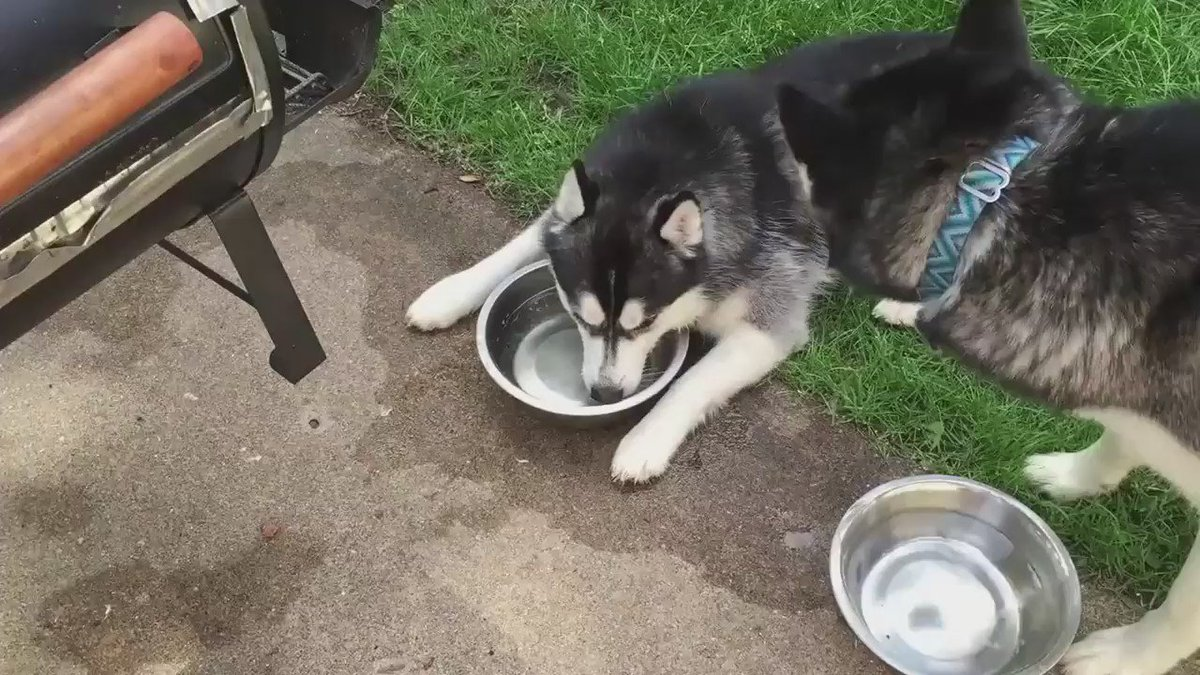

In [120]:
#Image of the dog with the most retweets
url = rc.jpg_url.iloc[0]
Disp.Image(requests.get(url).content)

In [121]:
#Checking for the dog with the highest favorite count
fc = cleaned_data.sort_values(by='favorite_count', ascending=False).reset_index()
fc

,index,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,335,822872901745569793,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10,None,puppo,39819.0,123717.0,...,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1,428,807106840509214720,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13.0,10,Stephan,NaN,51497.0,111297.0,...,1.0,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
2,114,866450705531457537,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13.0,10,Jamesy,pupper,30100.0,108565.0,...,2.0,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
3,874,739238157791694849,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13.0,10,None,doggo,52724.0,106889.0,...,1.0,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
4,61,879415818425184262,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13.0,10,Duddles,NaN,37283.0,92583.0,...,1.0,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2122,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,NaN,NaN,NaN,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2123,2123,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10,a,NaN,NaN,NaN,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2124,2124,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10,a,NaN,NaN,NaN,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2125,2125,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10,a,NaN,NaN,NaN,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


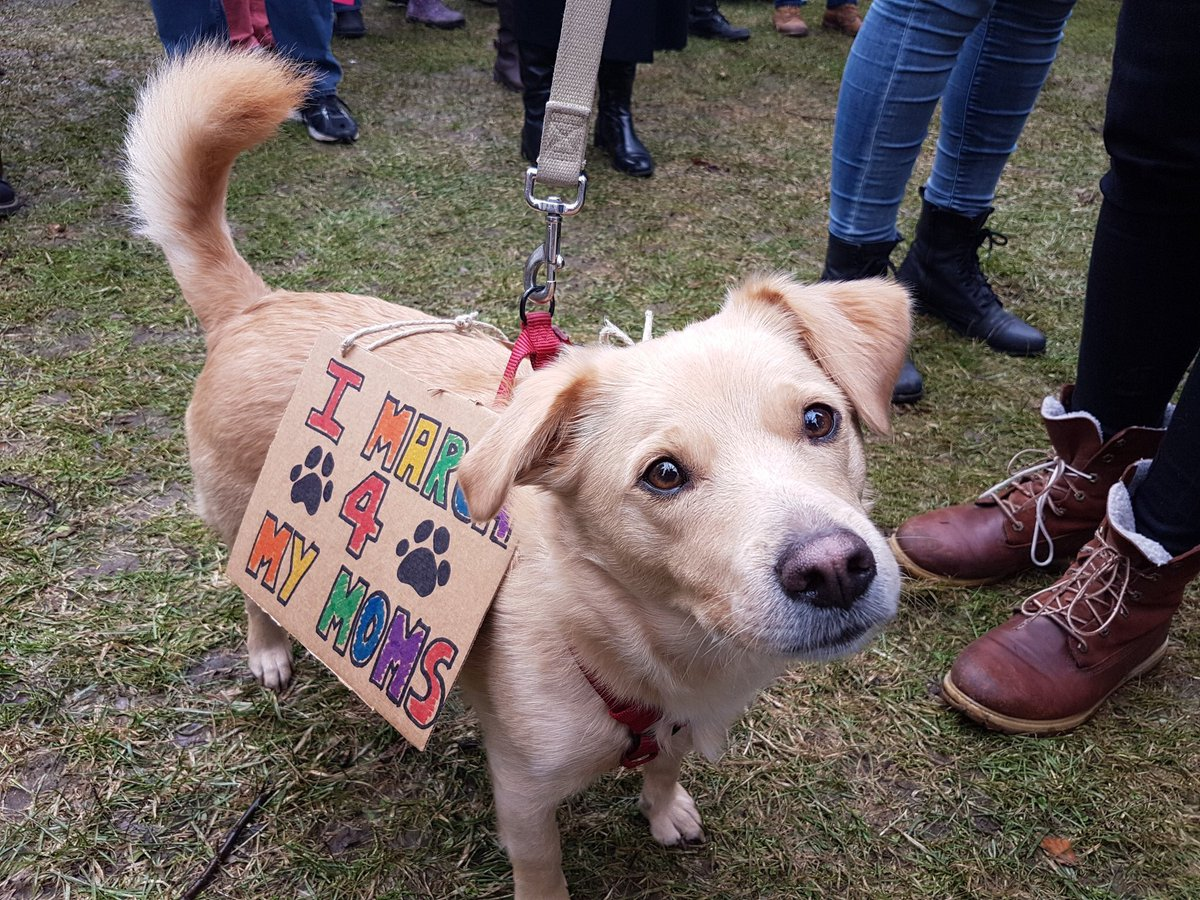

In [122]:
#Image of the dog with the most retweets
url = fc.jpg_url.iloc[0]
Disp.Image(requests.get(url).content)

### Insights:
1. The most common dog stage is the pupper, with the most common dog breeds under the pupper stage being the golden retriever, the pembroke and labrador retriever, respectively.
2. On average, the standard poodle dogbreed received the most retweets and the black-and-tan coonhound dogbreed received the most likes.
3. The pupper dog stage received the least likes and retweets on average, despite being the most common dog stage.
4. The dog with the highest retweets is an Eskimo dog with 52,724 retweets.
5. The dog with the highest likes is a Lakeland terrier with 123,717 likes.

### Visualization
**NB:** The data that was used in my visualisation is from the ‘twitter_archive_master.csv’.

#### Q: Is there a relationship between the retweet count and favorite count?

In [126]:
cleaned_data[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.924762
favorite_count,0.924762,1.000000


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

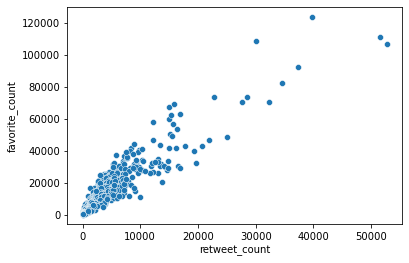

In [127]:
sns.scatterplot(x="retweet_count", y="favorite_count", data = cleaned_data)

- From the above, it is evident that there is a positive correlation between the retweet count and favorite count